<a href="https://colab.research.google.com/github/sharibhumayun/predict-trim/blob/main/TRIM_prediction_model_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/sharibhumayun/predict-trim/main/CSAT%20TRIM%20impact.csv')
df.head()

,Months,Mobily,STC,Zain,Communication,Proposition,Sales_Experience,Opt_inout,Network,Customer_Support,Billing_Payment,TRIM_Index
0,Feb'18,1,0,0,39.23,36.32,47.01,46.24,38.34,41.31,58.27,76.00
1,Mar'18,1,0,0,37.07,37.89,44.11,45.65,37.31,44.09,60.48,75.00
2,April'18,1,0,0,37.14,40.89,47.15,48.89,41.38,44.75,59.48,76.46
3,May'18,1,0,0,40.72,45.33,49.62,49.81,44.72,47.39,57.32,77.98
4,June'18,1,0,0,40.32,45.33,53.17,48.82,44.97,48.05,57.47,78.24


In [13]:
df.drop(['Months'], axis =1, inplace = True)

In [14]:
df.shape

(150, 11)

In [15]:
x= df.drop(['TRIM_Index'],axis = 1)
y = df['TRIM_Index']

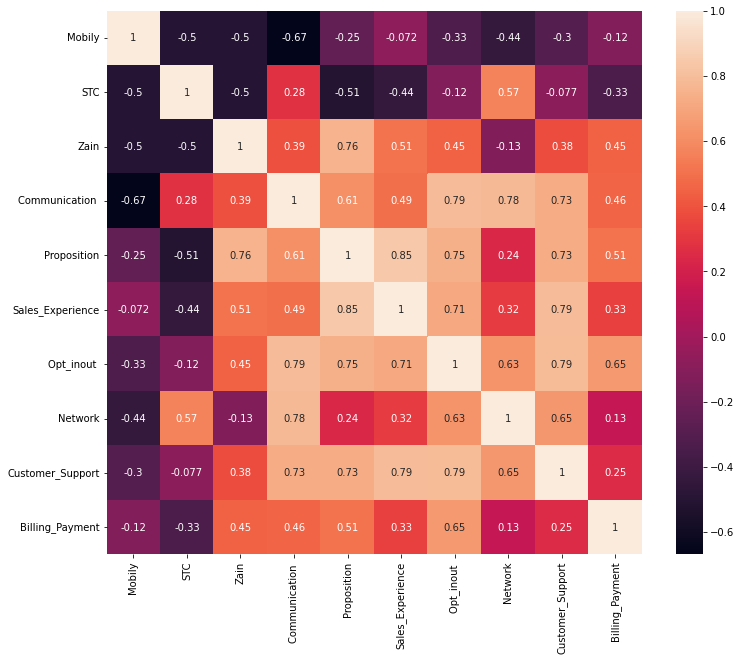

In [16]:
plt.figure (figsize = (12,10))
sns.heatmap(x.corr(),annot =True)

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([ 0.60948808,  0.04794956, -0.65743764,  0.02248086,  0.3782013 ,
        0.05887312,  0.25105475,  0.39968313,  0.05156086,  0.01595869])

In [21]:
lr.intercept_

24.516646731754292

In [22]:
y_pred = lr.predict(x_test)
y_pred

array([88.62730329, 86.58809299, 92.44503813, 93.80234266, 92.3236379 ,
       90.25257534, 84.68553605, 91.29699162, 86.17996973, 94.07361195,
       95.44092536, 85.22524853, 91.38365651, 82.85752342, 86.32974103,
       83.49672055, 91.15456371, 85.69704596, 83.07629897, 96.09587151,
       91.25435661, 98.51231641, 90.36540184, 99.23241428, 97.27874241,
       88.75712341, 95.68600106, 90.68111461, 94.76862826, 90.58140849])

In [23]:
lr.score(x_test,y_test)

0.9846205331788059

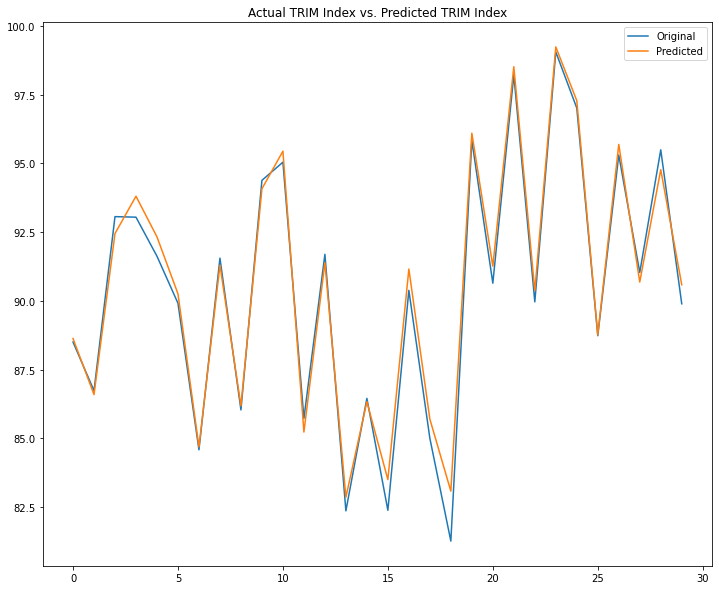

In [26]:
plt.figure(figsize =(12,10))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label = 'Original')
plt.plot(x_ax,y_pred,label = 'Predicted')
plt.title('Actual TRIM Index vs. Predicted TRIM Index')
plt.legend()
plt.show()

In [29]:
Input_values =[1,0,0,50,56,65,57,58,70,59]
Input_values = np.asarray(Input_values)
Input_values = Input_values.reshape(1,-1)
y_pred1 = lr.predict(Input_values)
y_pred1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93.2987688])

In [30]:
import pickle
filename = 'trained_model.sav'
pickle.dump(lr,open(filename,'wb'))

In [31]:
loaded_model= pickle.load(open('trained_model.sav', 'rb'))

In [32]:
Input_values =[1,0,0,50,56,65,57,58,70,59]
Input_values = np.asarray(Input_values)
Input_values = Input_values.reshape(1,-1)
y_pred1 = loaded_model.predict(Input_values)
y_pred1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93.2987688])